## Polynomial Regression
A regression equation is a polynomial regression equation if the power of an independent variable is more than 1. The equation below represents a polynomial equation:
\begin{equation}
y=\ a+b\ast x+\ c\ast x²
\end{equation}
In this regression technique, the best fit line is not a straight line. It is rather a curve that fits into the data points.
This is still considered to be linear model as the coefficients/weights associated with the features are still linear. x² is only a feature. However the curve that we are fitting is quadratic in nature.

![](images/quadratic.png)

### Overfitting/Underfitting
* Common problems that prevent accurate predictions
* When creating a model, key goal is **making accurate predictions** for **data it has not yet seen** 
* **Underfitting** occurs when a **model is too simple to make predictions**, based on its training data
    * You may use a **linear model**, such as **simple linear regression**, when problem really requires a **non-linear model**
* **Overfitting** occurs when your **model is too complex**
    * **Most extreme case** would be a **model that memorizes its training data**
    * New data that **matches the training data** will produce **perfect predictions**, but the model will not know what to do with data it has never seen.
    
![](images/overfitting.png)

(see https://medium.com/greyatom/what-is-underfitting-and-overfitting-in-machine-learning-and-how-to-deal-with-it-6803a989c76)  
  
Especially look out for curve towards the ends and see whether those shapes and trends make sense. Higher polynomials can end up producing weird results on extrapolation.

### Case blue gill fish
In 1981, n = 78 bluegills were randomly sampled from Lake Mary in Minnesota. The researchers (Cook and Weisberg, 1999) measured and recorded the following data:
- Response (y): length (in mm) of the fish
- Potential predictor (x1): age (in years) of the fish
The researchers were primarily interested in learning how the length of a blue gill fish is related to it's age.
The plot of the data suggests that there is positive trend in the data. That is, not surprisingly, as the age of blue gill fish increases, the length of the fish tends to increase. The trend, however, doesn't appear to be quite linear. It appears as if the relationship is slightly curved.


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Read the file bluegills.txt. The seperator is tab
url = 'https://raw.githubusercontent.com/HOGENT-Databases/DB3-Workshops/master/data/bluegills.txt'
fish = pd.read_csv(url, sep='\t')
fish.head(10)

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91
5,2,88
6,3,137
7,3,131
8,3,122
9,3,122


In [14]:
# Give the dimensions of the dataset
fish.shape

(78, 2)

Text(0, 0.5, 'length')

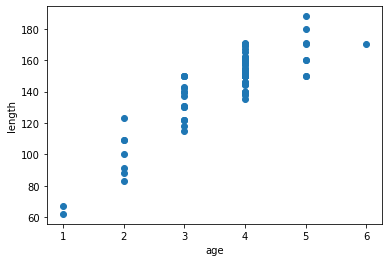

In [15]:
# Plot the length vs the age
plt.scatter(fish['age'], fish['length'])
plt.xlabel('age')
plt.ylabel('length')

In [17]:
from sklearn.model_selection import train_test_split
X = fish.drop('length',axis=1)
y = fish['length']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [18]:
# First use LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the slope:
print("Slope")
print(model.coef_)
print()

Intercept
66.87830687830683

Slope
[21.50793651]



In [19]:
y_predict = model.predict(X_test)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

mean = fish['length'].mean()
print ('Mean: ' + str(mean))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 10.35670194003527

Mean Squared Error: 170.92477114302497

Root Mean Squared Error: 13.073820066951548

Mean: 143.60256410256412

R square: 0.7537692216657645



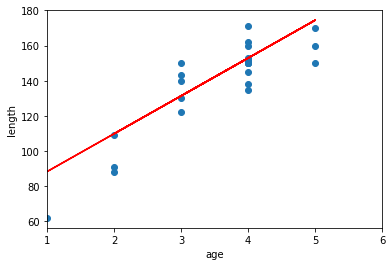

In [20]:
# Plot the dataset length vs age
# First calculate the minimum and the maximumvalue for age

xmin = fish['age'].min()
xmax = fish['age'].max()
# Plot the dataset
plt.scatter(X_test, y_test)
plt.plot(X_test, y_predict, color='red')
plt.xlim([xmin, xmax])

plt.xlabel('age')
plt.ylabel('length')
plt.show()

In [21]:
# Now we are using Polynomial Regression. 
# This is still LinearRegression because the coefficients/weights associated with the features are still linear
poly = PolynomialFeatures(degree=2)
# fit_transform will turn x**2 into a feaure
X_train_transform = poly.fit_transform(X_train)   
X_test_transform = poly.fit_transform(X_test)

model = LinearRegression()
model.fit(X_train_transform,y_train)

#To retrieve the intercept:
print("Intercept")
print(model.intercept_)
print()
#For retrieving the coefficients:
print("Coefficients")
print(model.coef_)
print()

Intercept
20.038274182324244

Coefficients
[ 0.         50.40361865 -4.15622825]



In [22]:
y_predict = model.predict(X_test_transform)

MAE = metrics.mean_absolute_error(y_test,y_predict)
print('Mean Absolute Error: '+ str(MAE))
print()

MSE = metrics.mean_squared_error(y_test,y_predict)
print('Mean Squared Error: '+ str(MSE))
print()

RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
print('Root Mean Squared Error: '+ str(RMSE))
print()

mean = fish['length'].mean()
print ('Mean: ' + str(mean))
print()

r2 = metrics.r2_score(y_test,y_predict)
print('R square: ' + str(r2))  
print()

Mean Absolute Error: 8.94718452795175

Mean Squared Error: 110.91608722394862

Root Mean Squared Error: 10.531670675821031

Mean: 143.60256410256412

R square: 0.8402165215474369



In [23]:
# Calculate the result of the polynomial for a specific value of x
def p(x):
    result = model.intercept_
    for i in range(0, len(model.coef_)):
        result += model.coef_[i] * x**i 
    return result

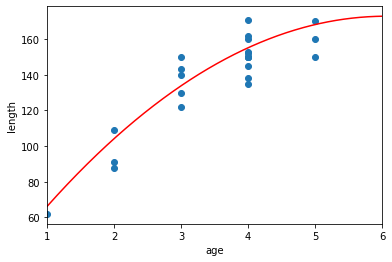

In [25]:
# Plot the dataset
plt.scatter(X_test, y_test)
plt.xlim([xmin, xmax])
plt.xlabel('age')
plt.ylabel('length')

# Plot the polynomial
t1 = np.arange(xmin, xmax, 0.01)
plt.plot(t1, p(t1), color='red')
plt.show()


The Mean Absolute Error and Root Mean Squared Error are smaller for Polynomial Regression.  
We will now use a for loop to create a model voor polynomials of degree = 1 .. 5 and to write out the root mean squared error

In [ ]:
from sklearn.model_selection import train_test_split
X = fish.drop('length',axis=1)
y = fish['length']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30)
for i in range(1,6):
    poly = PolynomialFeatures(degree=i)
    X_train_transform = poly.fit_transform(X_train)
    X_test_transform = poly.fit_transform(X_test)

    model = LinearRegression()
    model.fit(X_train_transform,y_train)
    
    y_predict = model.predict(X_test_transform)    
    RMSE = np.sqrt(metrics.mean_squared_error(y_test,y_predict))
    print('Root Mean Squared Error for i (test set) = ' + str(i) + ' is '+ str(RMSE))
    print()
    
    y_predict = model.predict(X_train_transform)
    RMSE = np.sqrt(metrics.mean_squared_error(y_train,y_predict))
    print('Root Mean Squared Error for i (training set) = ' + str(i) + ' is '+ str(RMSE))
    print()   

This is a clear example of overfitting: accuracy of the test set is getting better till degree 2. For higher degrees the accuracy is getting worse because of overfitting. This is confirmed by a better accuracy of the training set for higher degrees. 